In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

from matrix_profiler import MatrixProfiler

from helper_functions import read_in_file, plot_time_window

np.set_printoptions(suppress=True)

data_directory = './data/Feb2022/' # The root directory for where all the data files are stored
overall_filename = 'february_data.csv' # Filename where the concatenated individual files will be stored

Start of Matrix Profile Analysis

In [3]:
# Read in the data from february

src_file = 'february_data_by_second.csv'
# src_file = 'february_data.csv'

df_overall = read_in_file(src_file, keep_columns=['time', 'Continuous Bond Vibration', 'Continuous Bond FFT Band 3'])

# Uncomment to do a feed-forward fill. Mostly used for february_data.csv
# df_overall = df_overall.fillna(method='ffill') # Imputes NaNs from the last valid observation

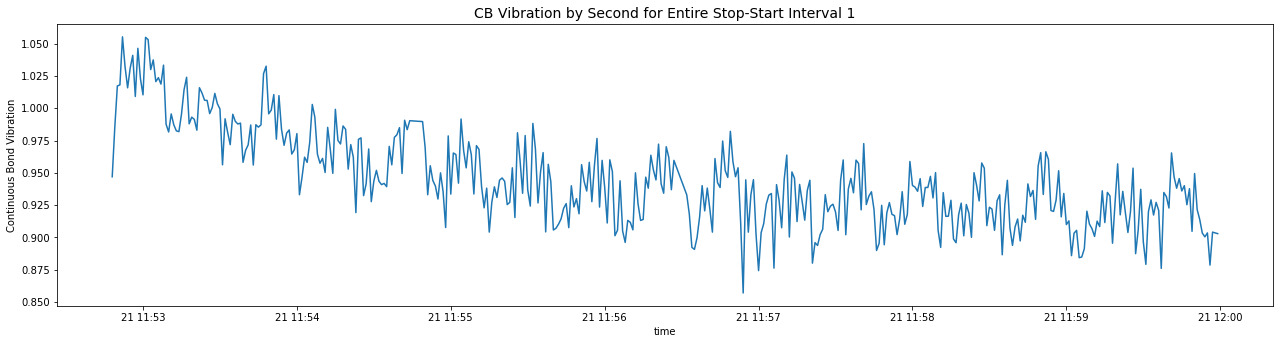

c:\Users\camer\Desktop\BYU\DS Capstone\P&G\PG_workspace\matrix_profiler.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.iloc[:,:] = MinMaxScaler().fit_transform(self.df.iloc[:,:])


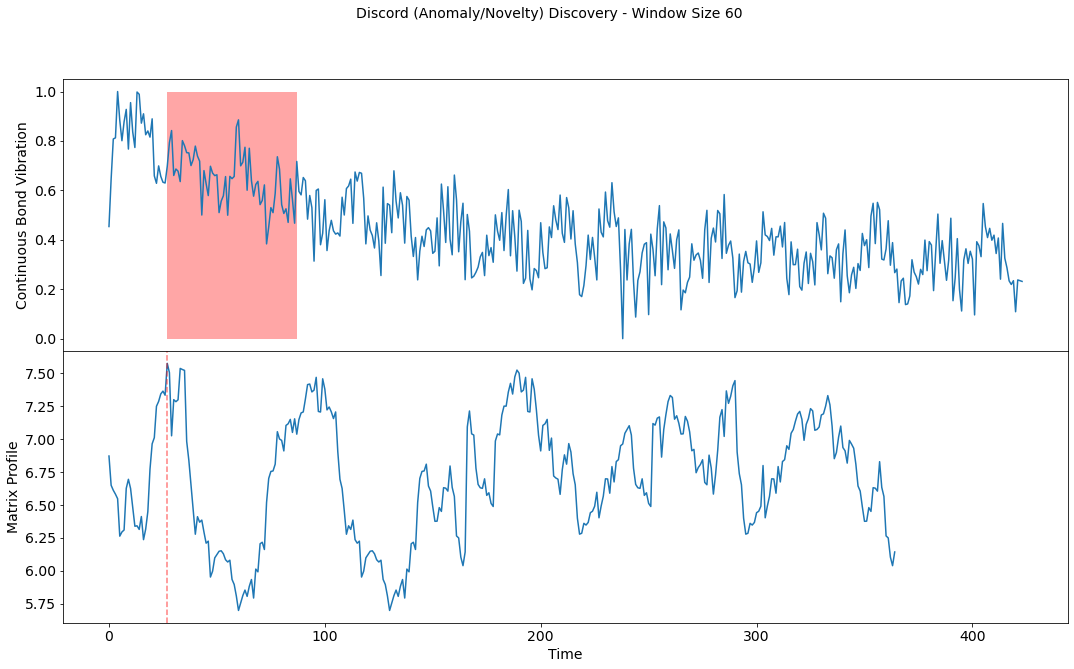

In [5]:
# Set the parameters for the analysis

t1 = datetime(year=2022, 
              month=2, 
              day=21, 
              hour=11, 
              minute=52, 
              second=48)
t2 = datetime(year=2022,
              month=2, 
              day=21, 
              hour=12, 
              minute=0, 
              second=0)

cols = ['Continuous Bond Vibration']

# Plot the time window for some quick EDA
plot_time_window(df_overall[cols], t1, t2, cols[0], fontsize=14,
                 title="CB Vibration by Second for Entire Stop-Start Interval 1",
                 save_fig=True, fname="figs/cb-vibr_start-stop-interv_ex-1.png")

matrix_profiler = MatrixProfiler(m=60, t1=t1, t2=t2)
matrix_profiler.fit(df_overall[cols])
matrix_profiler.display()